## Logistic Regression

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
df = pd.read_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\spam.csv', delimiter=',',header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

In [11]:
df.head()
print(df.shape)

(10, 2)


In [8]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)


['ham' 'ham' 'ham']


##  svm

In [13]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.logistic import LogisticRegression


In [14]:
def classifier():
    xx = np.linspace(1,10)
    yy = -regressor.coef_[0][0] / regressor.coef_[0][1] * xx - regressor.intercept_[0] / regressor.coef_[0][1]
    plt.plot(xx, yy)
    plt.scatter(x1,x2)
    plt.show()

In [15]:
x1 = [2,6,3,9,4,10]
x2 = [3,9,3,10,2,13]

In [16]:
X = np.array([[2,3],[6,9],[3,3],[9,10],[4,2],[10,13]])
y = [0,1,0,1,0,1]

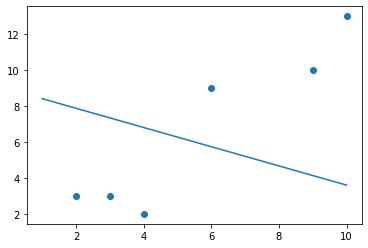

In [17]:
regressor = LogisticRegression()
regressor.fit(X,y)
classifier()

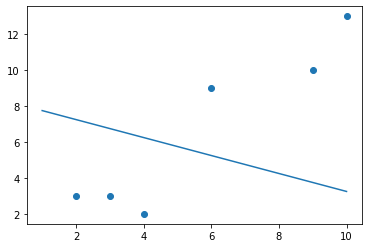

In [20]:
regressor = svm.SVC(kernel='linear',C = 1.0)
regressor.fit(X,y)
classifier()

## Decision  Tree

In [21]:
from sklearn.datasets import load_iris
import os
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from io import StringIO
import pydotplus
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\flowers.csv')
X = df[list(df.columns)[:-1]]
y = df['Flower']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

In [26]:
print(df.shape)
df.head()

(150, 5)


,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower
0,5.1,3.5,1.4,0.2,Rose
1,4.9,3.0,1.4,0.2,Rose
2,4.7,3.2,1.3,0.2,Rose
3,4.6,3.1,1.5,0.2,Rose
4,5.0,3.6,1.4,0.3,Rose


In [28]:
a = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5)  # entropy for information gain
a.fit(X_train, y_train) 
y_pred = a.predict(X_test) 
y_train.to_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\sss.csv')
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 


Confusion Matrix:  [[15  1  0]
 [ 3  6  0]
 [ 0  0 13]]
Accuracy :  89.47368421052632
Report :                precision    recall  f1-score   support

      Jasmin       0.83      0.94      0.88        16
       Lotus       0.86      0.67      0.75         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



In [32]:
dot_data = StringIO()
export_graphviz(a, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png(r"C:\Users\NITHI\Documents\AlterSYS\Dataset\decisiontree.png")

InvocationException: GraphViz's executables not found

In [33]:
b = RandomForestClassifier(max_depth = None, n_estimators=100)
b.fit(X_train,y_train)
y_pred = b.predict(X_test) 
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 

Confusion Matrix:  [[15  1  0]
 [ 0  9  0]
 [ 0  0 13]]
Accuracy :  97.36842105263158
Report :                precision    recall  f1-score   support

      Jasmin       1.00      0.94      0.97        16
       Lotus       0.90      1.00      0.95         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [34]:
export_graphviz(b.estimators_[5], out_file='tree.dot', feature_names = X_train.columns.tolist(),
                class_names = ['Lotus', 'Jasmin', 'Rose'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [35]:
                
os.system ("dot -Tpng tree.dot -o randomforest.png -Gdpi=600")
Image(filename = 'randomforest.png')
f = pd.Series(b.feature_importances_,index=X_train.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=f, y=f.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'randomforest.png'

## Naive Bayes

In [7]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [10]:
from sklearn import preprocessing
#creat labelEncoder
le = preprocessing.LabelEncoder()
wheather_encoded=le.fit_transform(weather)
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [12]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label) 

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


##  Gaussian Classifier

In [39]:
cost = 3 
rate = 0.01 
precision = 0.000001 
diff = 1  
iters = 0 
df = lambda x: 2*(x+5) 
while diff > precision:
    prev_x = cost 
    cost = cost - rate * df(prev_x) 
    diff = abs(cost - prev_x) 
    iters = iters+1 
    print("Iteration",iters,"\nX value is",cost) 
    
print("The local minimum occurs at", cost)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

X value is -4.980570548371915
Iteration 299 
X value is -4.980959137404477
Iteration 300 
X value is -4.981339954656387
Iteration 301 
X value is -4.981713155563259
Iteration 302 
X value is -4.982078892451994
Iteration 303 
X value is -4.9824373146029535
Iteration 304 
X value is -4.982788568310895
Iteration 305 
X value is -4.983132796944677
Iteration 306 
X value is -4.983470141005784
Iteration 307 
X value is -4.983800738185668
Iteration 308 
X value is -4.984124723421955
Iteration 309 
X value is -4.984442228953515
Iteration 310 
X value is -4.984753384374445
Iteration 311 
X value is -4.985058316686956
Iteration 312 
X value is -4.9853571503532175
Iteration 313 
X value is -4.985650007346153
Iteration 314 
X value is -4.9859370071992295
Iteration 315 
X value is -4.986218267055245
Iteration 316 
X value is -4.98649390171414
Iteration 317 
X value is -4.986764023679857
Iteration 318 
X value is -4.98702874320626
Iteration 319 
X value is -4.987288168342134
Iteration 320 
X value i

X value is -4.999875554422772
Iteration 549 
X value is -4.999878043334316
Iteration 550 
X value is -4.99988048246763
Iteration 551 
X value is -4.999882872818278
Iteration 552 
X value is -4.999885215361912
Iteration 553 
X value is -4.999887511054674
Iteration 554 
X value is -4.999889760833581
Iteration 555 
X value is -4.999891965616909
Iteration 556 
X value is -4.999894126304571
Iteration 557 
X value is -4.999896243778479
Iteration 558 
X value is -4.999898318902909
Iteration 559 
X value is -4.999900352524851
Iteration 560 
X value is -4.9999023454743545
Iteration 561 
X value is -4.999904298564868
Iteration 562 
X value is -4.9999062125935705
Iteration 563 
X value is -4.999908088341699
Iteration 564 
X value is -4.9999099265748645
Iteration 565 
X value is -4.999911728043367
Iteration 566 
X value is -4.9999134934825
Iteration 567 
X value is -4.99991522361285
Iteration 568 
X value is -4.999916919140593
Iteration 569 
X value is -4.999918580757781
Iteration 570 
X value is 

## Random Forest

In [41]:
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split 

In [43]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=8, centers=2,
                  random_state=0, cluster_std=1.0)
print (X)

[[1.12031365 5.75806083]
 [3.54934659 0.6925054 ]
 [2.81630525 1.01933868]
 [2.49913075 1.23133799]
 [0.87305123 4.71438583]
 [2.84382807 3.32650945]
 [2.36833522 0.04356792]
 [1.9263585  4.15243012]]


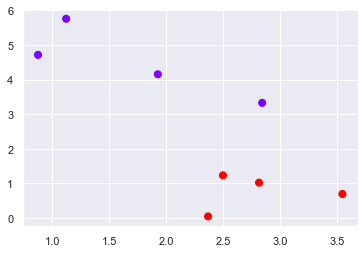

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
plt.show()

In [51]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

In [52]:
# fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    

IndentationError: unexpected indent (<ipython-input-52-d97496f89e16>, line 2)

In [53]:
# Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)


IndentationError: unexpected indent (<ipython-input-53-82def2d7c269>, line 2)

In [ ]:
ax.set(xlim=xlim, ylim=ylim)
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
visualize_classifier(tree, X, y)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,random_state=1).fit(X, y)
visualize_classifier(bag, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdm = RandomForestClassifier(n_estimators=100, random_state=0).fit(X, y)
visualize_classifier(rdm, X, y);